In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.decomposition import PCA

In [16]:
dfg = pd.read_csv('wat-good.csv')
dfm = pd.read_csv('wat-mals.csv')

In [17]:
dfg.head()

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,26,26,1
1,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,1
2,15,2,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,24,26,1
3,19,3,1,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,23,26,1
4,23,7,0,3,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,22,26,1


In [18]:
dfm.head()

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,59,59,0
1,7,1,1,0,0xecf40,0,0,3,2,8,1,1,29,13,3,1,58,59,0
2,11,5,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,57,59,0
3,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,56,59,0
4,15,2,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,55,59,0


In [19]:
df = dfg.append(dfm, ignore_index=True)

In [20]:
df.head()

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,26,26,1
1,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,1
2,15,2,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,24,26,1
3,19,3,1,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,23,26,1
4,23,7,0,3,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,22,26,1


In [21]:
df = df.sort_values('time')

In [22]:
df.head(50)

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,26,26,1
329114,7,1,1,0,0xecf40,0,0,3,2,8,1,1,29,13,3,1,58,59,0
329113,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,59,59,0
329115,11,5,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,57,59,0
329116,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,56,59,0
1,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,25,26,1
329117,15,2,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,55,59,0
329118,15,9,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,54,59,0
2,15,2,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,24,26,1
329119,19,13,0,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,53,59,0


In [23]:
df.to_csv('wat-all-pkt-big.csv',index=False)

In [24]:
df = pd.read_csv("wat-all-pkt-big.csv")
df

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,26,26,1
1,7,1,1,0,0xecf40,0,0,3,2,8,1,1,29,13,3,1,58,59,0
2,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,59,59,0
3,11,5,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,1,57,59,0
4,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,0,56,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658221,3251515,0,0,1,0x4d2c0,3,1,1,4,16,29,13,0,0,3251494,10027,5,27,1
658222,3251516,0,0,1,0x4d2c0,3,2,1,4,16,29,13,0,0,3251494,10027,4,27,1
658223,3251517,0,0,1,0x4d2c0,3,3,1,4,16,29,13,0,0,3251494,10027,3,27,1
658224,3251517,4,3,1,0x4d2c0,3,4,2,4,16,29,13,0,0,3251494,10027,2,27,1


In [25]:
df.corr()

,time,router,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,target
time,1.000000,0.045252,-0.006598,0.018537,0.036963,0.009570,-0.014617,-0.024685,-0.029733,0.000980,0.023924,0.038687,0.059043,1.000000,0.981881,-0.031626,-0.054473,0.082487
router,0.045252,1.000000,0.196514,0.041851,0.039941,-0.011045,0.016852,0.047473,0.046143,0.433353,0.590154,0.104760,0.289989,0.045252,0.045956,0.209207,0.296200,0.005570
outport,-0.006598,0.196514,1.000000,-0.409028,0.010085,0.002590,-0.003971,0.339349,0.406087,0.356417,0.316219,-0.390821,-0.314492,-0.006594,-0.005635,0.094015,0.093111,0.004178
inport,0.018537,0.041851,-0.409028,1.000000,-0.049263,-0.007242,0.011064,-0.308897,-0.421968,-0.408046,-0.312571,0.376763,0.342501,0.018533,0.021109,0.042568,0.017116,0.008071
packet_type,0.036963,0.039941,0.010085,-0.049263,1.000000,0.220969,-0.337403,-0.257277,-0.287185,0.109978,0.056371,0.021082,-0.001464,0.036965,0.039859,0.046376,-0.002349,0.006802
flit_id,0.009570,-0.011045,0.002590,-0.007242,0.220969,1.000000,-0.000967,0.179914,0.149750,-0.014018,0.001786,-0.035448,-0.022919,0.009566,0.009593,-0.057730,0.016853,0.002161
flit_type,-0.014617,0.016852,-0.003971,0.011064,-0.337403,-0.000967,1.000000,-0.274699,-0.228641,0.021393,-0.002737,0.054113,0.034980,-0.014621,-0.014667,-0.048309,0.068266,-0.003289
vnet,-0.024685,0.047473,0.339349,-0.308897,-0.257277,0.179914,-0.274699,1.000000,0.970800,0.535558,0.473741,-0.824898,-0.599471,-0.024681,-0.028886,-0.102335,0.032395,-0.003693
vc,-0.029733,0.046143,0.406087,-0.421968,-0.287185,0.149750,-0.228641,0.970800,1.000000,0.532087,0.455849,-0.809734,-0.595874,-0.029728,-0.033703,-0.096296,0.022097,-0.005507
src_ni,0.000980,0.433353,0.356417,-0.408046,0.109978,-0.014018,0.021393,0.535558,0.532087,1.000000,0.895543,-0.566841,-0.408006,0.000984,-0.000350,-0.016040,0.202818,-0.002434


In [26]:
train_X = df.drop(columns=['packet_address','time','target'])

In [27]:
train_X

,router,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all
0,0,2,0,0,0,3,2,8,0,0,23,7,3,0,26,26
1,1,1,0,0,0,3,2,8,1,1,29,13,3,1,58,59
2,0,2,0,0,0,3,2,8,0,0,23,7,3,0,59,59
3,5,1,3,0,0,3,2,8,1,1,29,13,3,1,57,59
4,1,2,4,0,0,3,2,8,0,0,23,7,3,0,56,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658221,0,0,1,3,1,1,4,16,29,13,0,0,3251494,10027,5,27
658222,0,0,1,3,2,1,4,16,29,13,0,0,3251494,10027,4,27
658223,0,0,1,3,3,1,4,16,29,13,0,0,3251494,10027,3,27
658224,4,3,1,3,4,2,4,16,29,13,0,0,3251494,10027,2,27


In [28]:
#normalization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,0.50,0.00,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.0,0.000000,0.240385,0.240385
1,0.066667,0.25,0.00,0.0,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.935484,0.866667,0.0,0.000097,0.548077,0.557692
2,0.000000,0.50,0.00,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.0,0.000000,0.557692,0.557692
3,0.333333,0.25,0.75,0.0,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.935484,0.866667,0.0,0.000097,0.538462,0.557692
4,0.066667,0.50,1.00,0.0,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.0,0.000000,0.528846,0.557692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658221,0.000000,0.00,0.25,0.5,0.25,0.333333,1.0,0.727273,0.935484,0.866667,0.000000,0.000000,1.0,0.973495,0.038462,0.250000
658222,0.000000,0.00,0.25,0.5,0.50,0.333333,1.0,0.727273,0.935484,0.866667,0.000000,0.000000,1.0,0.973495,0.028846,0.250000
658223,0.000000,0.00,0.25,0.5,0.75,0.333333,1.0,0.727273,0.935484,0.866667,0.000000,0.000000,1.0,0.973495,0.019231,0.250000
658224,0.266667,0.75,0.25,0.5,1.00,0.666667,1.0,0.727273,0.935484,0.866667,0.000000,0.000000,1.0,0.973495,0.009615,0.250000


In [29]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
0,1.000000,0.196514,0.041851,0.039941,-0.011045,0.016852,0.047473,0.046143,0.433353,0.590154,0.104760,0.289989,0.045252,0.045956,0.209207,0.296200,0.005570
1,0.196514,1.000000,-0.409028,0.010085,0.002590,-0.003971,0.339349,0.406087,0.356417,0.316219,-0.390821,-0.314492,-0.006594,-0.005635,0.094015,0.093111,0.004178
2,0.041851,-0.409028,1.000000,-0.049263,-0.007242,0.011064,-0.308897,-0.421968,-0.408046,-0.312571,0.376763,0.342501,0.018533,0.021109,0.042568,0.017116,0.008071
3,0.039941,0.010085,-0.049263,1.000000,0.220969,-0.337403,-0.257277,-0.287185,0.109978,0.056371,0.021082,-0.001464,0.036965,0.039859,0.046376,-0.002349,0.006802
4,-0.011045,0.002590,-0.007242,0.220969,1.000000,-0.000967,0.179914,0.149750,-0.014018,0.001786,-0.035448,-0.022919,0.009566,0.009593,-0.057730,0.016853,0.002161
5,0.016852,-0.003971,0.011064,-0.337403,-0.000967,1.000000,-0.274699,-0.228641,0.021393,-0.002737,0.054113,0.034980,-0.014621,-0.014667,-0.048309,0.068266,-0.003289
6,0.047473,0.339349,-0.308897,-0.257277,0.179914,-0.274699,1.000000,0.970800,0.535558,0.473741,-0.824898,-0.599471,-0.024681,-0.028886,-0.102335,0.032395,-0.003693
7,0.046143,0.406087,-0.421968,-0.287185,0.149750,-0.228641,0.970800,1.000000,0.532087,0.455849,-0.809734,-0.595874,-0.029728,-0.033703,-0.096296,0.022097,-0.005507
8,0.433353,0.356417,-0.408046,0.109978,-0.014018,0.021393,0.535558,0.532087,1.000000,0.895543,-0.566841,-0.408006,0.000984,-0.000350,-0.016040,0.202818,-0.002434
9,0.590154,0.316219,-0.312571,0.056371,0.001786,-0.002737,0.473741,0.455849,0.895543,1.000000,-0.434330,-0.228364,0.023926,0.023327,0.067496,0.292963,0.001584


In [30]:
train_Y = df['target']

In [31]:
train_Y

0         1
1         0
2         0
3         0
4         0
         ..
658221    1
658222    1
658223    1
658224    1
658225    1
Name: target, Length: 658226, dtype: int64

In [32]:
pca = PCA(0.95)

In [33]:
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
principal_components = pca.transform(train_X)
principal_components

array([[-0.62527811, -0.43576359,  0.80172151, ..., -0.46379696,
        -0.49815317,  0.0018908 ],
       [-0.85524941, -0.1463278 ,  0.83952563, ..., -0.50295204,
        -0.77391294,  0.25692748],
       [-0.62489154, -0.37971492,  0.8238378 , ..., -0.50069457,
        -0.48277076,  0.19628834],
       ...,
       [ 1.06373937, -0.18079617, -0.78135442, ...,  0.40473614,
        -0.43256024,  0.18501486],
       [ 1.24856985,  0.04745619, -0.73053497, ..., -0.11026076,
        -0.03860957,  0.11010189],
       [ 1.05689421, -0.17271894, -0.77908285, ...,  0.31693845,
        -0.44698778,  0.1760958 ]])

In [35]:
pca.explained_variance_ratio_

array([0.38487738, 0.13758192, 0.10265571, 0.08414626, 0.07204331,
       0.06295374, 0.0549706 , 0.04478554, 0.01704232])

In [36]:
features = range(pca.n_components_)

Text(0, 0.5, 'Variance')

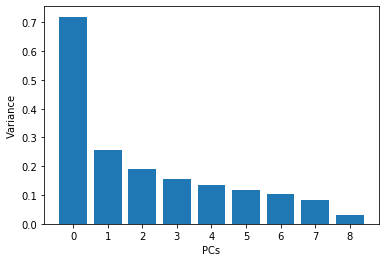

In [37]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [38]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8
0,-0.625278,-0.435764,0.801722,0.698010,0.146164,-0.151327,-0.463797,-0.498153,0.001891
1,-0.855249,-0.146328,0.839526,0.483384,0.050388,-0.106839,-0.502952,-0.773913,0.256927
2,-0.624892,-0.379715,0.823838,0.679852,0.147091,-0.132635,-0.500695,-0.482771,0.196288
3,-1.011990,-0.018351,0.825364,0.149639,-0.342814,-0.257635,-0.676909,-0.264596,0.200830
4,-0.851434,-0.364766,0.784838,0.290874,-0.356192,-0.353659,-0.672454,0.164535,0.328080
...,...,...,...,...,...,...,...,...,...
658221,1.042401,-0.132864,-0.719764,0.011039,-0.528145,-0.205505,0.393218,-0.441432,0.186301
658222,1.053070,-0.156830,-0.750559,-0.154570,-0.368786,-0.275702,0.398977,-0.436996,0.185658
658223,1.063739,-0.180796,-0.781354,-0.320179,-0.209426,-0.345899,0.404736,-0.432560,0.185015
658224,1.248570,0.047456,-0.730535,-0.220235,0.308106,-0.422671,-0.110261,-0.038610,0.110102


In [39]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df

,0,1,2,3,4,5,6,7,8,target
0,-0.625278,-0.435764,0.801722,0.698010,0.146164,-0.151327,-0.463797,-0.498153,0.001891,1
1,-0.855249,-0.146328,0.839526,0.483384,0.050388,-0.106839,-0.502952,-0.773913,0.256927,0
2,-0.624892,-0.379715,0.823838,0.679852,0.147091,-0.132635,-0.500695,-0.482771,0.196288,0
3,-1.011990,-0.018351,0.825364,0.149639,-0.342814,-0.257635,-0.676909,-0.264596,0.200830,0
4,-0.851434,-0.364766,0.784838,0.290874,-0.356192,-0.353659,-0.672454,0.164535,0.328080,0
...,...,...,...,...,...,...,...,...,...,...
658221,1.042401,-0.132864,-0.719764,0.011039,-0.528145,-0.205505,0.393218,-0.441432,0.186301,1
658222,1.053070,-0.156830,-0.750559,-0.154570,-0.368786,-0.275702,0.398977,-0.436996,0.185658,1
658223,1.063739,-0.180796,-0.781354,-0.320179,-0.209426,-0.345899,0.404736,-0.432560,0.185015,1
658224,1.248570,0.047456,-0.730535,-0.220235,0.308106,-0.422671,-0.110261,-0.038610,0.110102,1


In [40]:
final_df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000000e+00,-3.187913e-15,5.722354e-16,6.330921e-16,-2.170117e-15,-4.075023e-15,6.413458e-15,-2.476508e-15,-5.751464e-15,-0.004884
1,-3.187913e-15,1.000000e+00,2.351550e-16,-5.248944e-15,-5.471293e-15,-1.457217e-15,-3.212779e-16,-2.728557e-15,-3.974054e-14,0.007294
2,5.722354e-16,2.351550e-16,1.000000e+00,-8.656229e-16,-1.806166e-15,-4.347337e-16,1.490684e-15,4.644733e-16,-6.914921e-15,-0.035430
3,6.330921e-16,-5.248944e-15,-8.656229e-16,1.000000e+00,4.204346e-15,-4.831881e-15,3.705594e-15,8.398504e-15,1.272371e-14,0.002229
4,-2.170117e-15,-5.471293e-15,-1.806166e-15,4.204346e-15,1.000000e+00,-6.204391e-15,-6.614084e-16,6.191928e-15,3.400259e-15,0.000664
5,-4.075023e-15,-1.457217e-15,-4.347337e-16,-4.831881e-15,-6.204391e-15,1.000000e+00,-5.185066e-15,2.891745e-15,-6.007509e-15,0.001832
6,6.413458e-15,-3.212779e-16,1.490684e-15,3.705594e-15,-6.614084e-16,-5.185066e-15,1.000000e+00,6.384177e-15,2.282822e-14,0.000549
7,-2.476508e-15,-2.728557e-15,4.644733e-16,8.398504e-15,6.191928e-15,2.891745e-15,6.384177e-15,1.000000e+00,-1.937359e-14,0.007117
8,-5.751464e-15,-3.974054e-14,-6.914921e-15,1.272371e-14,3.400259e-15,-6.007509e-15,2.282822e-14,-1.937359e-14,1.000000e+00,-0.039410
target,-4.884425e-03,7.294036e-03,-3.542991e-02,2.228777e-03,6.643609e-04,1.831914e-03,5.485405e-04,7.117246e-03,-3.941009e-02,1.000000


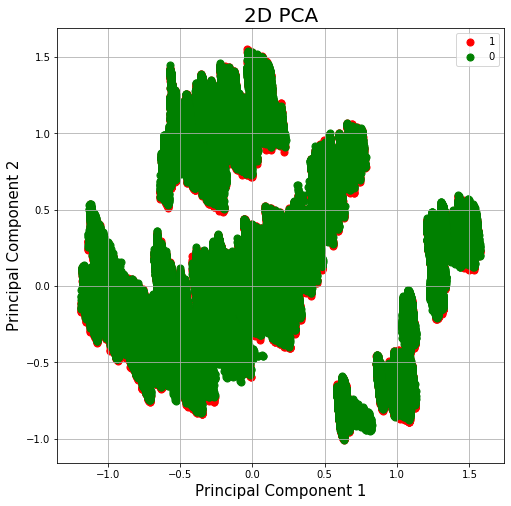

In [41]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 0]
               , final_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [42]:
dup_df = df.drop(columns=['packet_address','time'])
dup_df

,router,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,pkt_chuck,pkt_count_all,pkt_max_all,target
0,0,2,0,0,0,3,2,8,0,0,23,7,3,0,26,26,1
1,1,1,0,0,0,3,2,8,1,1,29,13,3,1,58,59,0
2,0,2,0,0,0,3,2,8,0,0,23,7,3,0,59,59,0
3,5,1,3,0,0,3,2,8,1,1,29,13,3,1,57,59,0
4,1,2,4,0,0,3,2,8,0,0,23,7,3,0,56,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658221,0,0,1,3,1,1,4,16,29,13,0,0,3251494,10027,5,27,1
658222,0,0,1,3,2,1,4,16,29,13,0,0,3251494,10027,4,27,1
658223,0,0,1,3,3,1,4,16,29,13,0,0,3251494,10027,3,27,1
658224,4,3,1,3,4,2,4,16,29,13,0,0,3251494,10027,2,27,1


In [43]:
dup_df[dup_df.duplicated()].shape

(0, 17)

In [44]:
dup_df[dup_df.duplicated()].count()

router           0
outport          0
inport           0
packet_type      0
flit_id          0
flit_type        0
vnet             0
vc               0
src_ni           0
src_router       0
dst_ni           0
dst_router       0
enq_time         0
pkt_chuck        0
pkt_count_all    0
pkt_max_all      0
target           0
dtype: int64

In [45]:
seed = 7
np.random.seed(seed)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(principal_df, train_Y, test_size=0.32, random_state=seed, shuffle=True)

In [47]:
model = Sequential()

In [48]:
n_cols = principal_df.shape[1]
n_cols

9

In [49]:
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)

In [51]:
model.fit(x_train, y_train, epochs=30, validation_split=0.2)

Train on 358074 samples, validate on 89519 samples
Epoch 1/30
358074/358074 [==============================] - 38s 105us/step - loss: 0.2499 - accuracy: 0.5048 - val_loss: 0.2498 - val_accuracy: 0.5089
Epoch 2/30
358074/358074 [==============================] - 32s 90us/step - loss: 0.2498 - accuracy: 0.5116 - val_loss: 0.2497 - val_accuracy: 0.5127
Epoch 3/30
358074/358074 [==============================] - 30s 84us/step - loss: 0.2496 - accuracy: 0.5152 - val_loss: 0.2495 - val_accuracy: 0.5145
Epoch 4/30
358074/358074 [==============================] - 33s 94us/step - loss: 0.2494 - accuracy: 0.5161 - val_loss: 0.2493 - val_accuracy: 0.5177
Epoch 5/30
358074/358074 [==============================] - 28s 78us/step - loss: 0.2491 - accuracy: 0.5178 - val_loss: 0.2490 - val_accuracy: 0.5167
Epoch 6/30
358074/358074 [==============================] - 35s 97us/step - loss: 0.2487 - accuracy: 0.5192 - val_loss: 0.2486 - val_accuracy: 0.5197
Epoch 7/30
358074/358074 [======================

In [80]:
scores = model.evaluate(x_test, y_test, verbose=0)

In [82]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.54%


In [83]:
dff = pd.read_csv('wat-all-pkt-big.csv',nrows=500)

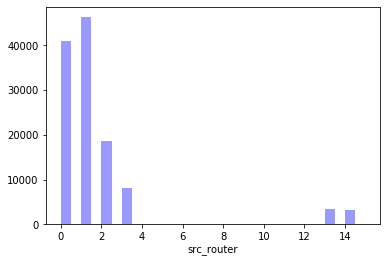

In [84]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

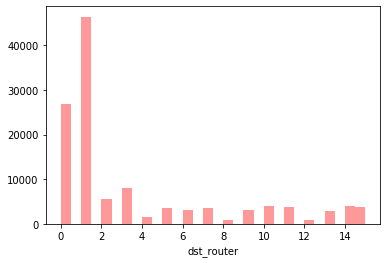

In [85]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

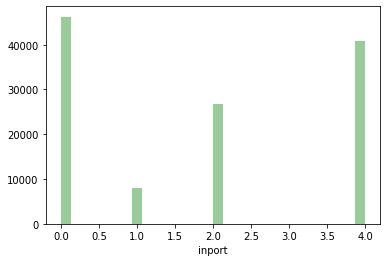

In [86]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

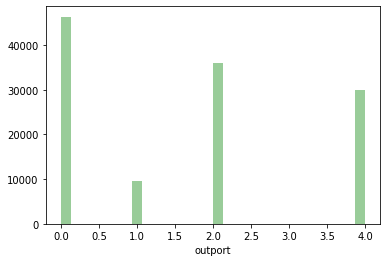

In [87]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

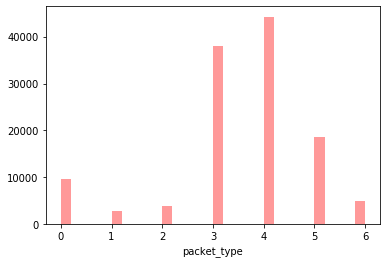

In [88]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='red')